In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [66]:
df = pd.read_csv("../Data/seoul_2.csv")
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,30007,873,9,14,1.0
1,종로구,2014,27484,905,9,14,1.0
2,종로구,2015,27470,906,9,14,1.0
3,종로구,2016,26386,846,9,13,1.0
4,종로구,2017,25814,689,9,13,1.0


## RandomForestRegressor

In [67]:
from sklearn.cluster import KMeans

# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']

df_temp = df.copy()

data_points = df[target_col].values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
df['cluster_id'] = km.labels_

# Feature, Target
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

# -----------------------------
df['cluster_id'] = df['cluster_id'] + 10
df_temp = df.sort_values(by='전출인구', ascending=True)
temp_list = df_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df['cluster_id'][df['cluster_id'] == temp] = i
    i-=1
df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
df['cluster_id'].unique()

# -----------------------------
# Feature, Target
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(train_input, train_target)

print("Train score :", rf.score(test_input, test_target))

Train score : 0.9999789569735487


In [68]:
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,30007,873,9,14,1.0
1,종로구,2014,27484,905,9,14,1.0
2,종로구,2015,27470,906,9,14,1.0
3,종로구,2016,26386,846,9,13,1.0
4,종로구,2017,25814,689,9,13,1.0


In [69]:
pred_cluster = []

for i in range(len(df)):
    # pred_cluster.append(rf.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5], df.iloc[i,6], df.iloc[i,7], df.iloc[i,8], df.iloc[i,9]]]))
    pred_cluster.append(rf.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5]]]))

df['pred_cluster'] = pred_cluster
df

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,14,1.00,[1.0]
1,종로구,2014,27484,905,9,14,1.00,[1.0]
2,종로구,2015,27470,906,9,14,1.00,[1.0]
3,종로구,2016,26386,846,9,13,1.00,[1.0]
4,종로구,2017,25814,689,9,13,1.00,[1.0]
...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.00,[0.0]
221,강동구,2018,68933,2659,17,27,0.33,[0.3299999999999991]
222,강동구,2019,67292,2437,17,27,0.33,[0.3299999999999991]
223,강동구,2020,78271,2535,17,28,0.33,[0.3299999999999991]


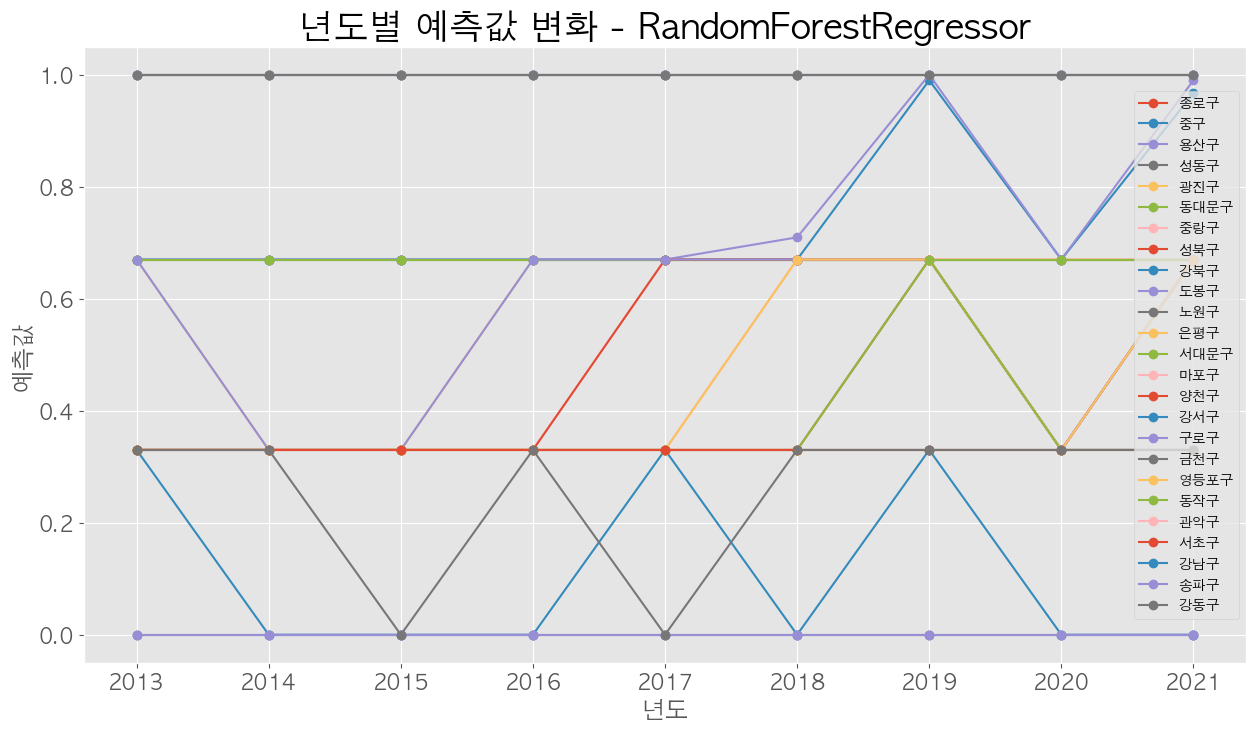

In [70]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

gungu = df["시군구"].unique()
years = list(range(2013, 2022))
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black','black']
colors = 'rainbow'

for i in range(len(gungu)):
    
    ax.plot(
        years,
        df[df['시군구'] == gungu[i]]['pred_cluster'],
        marker='o',
        label=gungu[i],
        # color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
# ax.set_xlim(2012, 2022)
# ax.set_ylim(0.75, 1.05)
ax.set_title('년도별 예측값 변화 - RandomForestRegressor', size=25)
ax.set_ylabel('예측값', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('년도', fontsize=17)
# ax.set_xticklabels([0, 2013, 2015, 2017, 2019, 2021], rotation=0, fontsize=15)

plt.show()

## Linear Regression

In [71]:
df = pd.read_csv("../Data/seoul_2.csv")
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,30007,873,9,14,1.0
1,종로구,2014,27484,905,9,14,1.0
2,종로구,2015,27470,906,9,14,1.0
3,종로구,2016,26386,846,9,13,1.0
4,종로구,2017,25814,689,9,13,1.0


In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print("Train score:", lr.score(test_input, test_target))

Train score: 0.9130116117877272


In [73]:
df

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,30007,873,9,14,1.00
1,종로구,2014,27484,905,9,14,1.00
2,종로구,2015,27470,906,9,14,1.00
3,종로구,2016,26386,846,9,13,1.00
4,종로구,2017,25814,689,9,13,1.00
...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.00
221,강동구,2018,68933,2659,17,27,0.33
222,강동구,2019,67292,2437,17,27,0.33
223,강동구,2020,78271,2535,17,28,0.33


In [74]:
pred_cluster = []

for i in range(len(df)):
    # pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5], df.iloc[i,6], df.iloc[i,7], df.iloc[i,8], df.iloc[i,9]]]))
    pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5]]]))

df['pred_cluster'] = pred_cluster
df

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,14,1.00,[0.969257663705784]
1,종로구,2014,27484,905,9,14,1.00,[1.004041010371882]
2,종로구,2015,27470,906,9,14,1.00,[1.0042302076494145]
3,종로구,2016,26386,846,9,13,1.00,[1.0179941419548224]
4,종로구,2017,25814,689,9,13,1.00,[1.0266416988205942]
...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.00,[0.1415600274863602]
221,강동구,2018,68933,2659,17,27,0.33,[0.44554657316892543]
222,강동구,2019,67292,2437,17,27,0.33,[0.4692961903014161]
223,강동구,2020,78271,2535,17,28,0.33,[0.318356627107633]


In [75]:
df['pred_cluster'] = df['pred_cluster'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시군구           225 non-null    object 
 1   년도            225 non-null    int64  
 2   전출인구          225 non-null    int64  
 3   출생아수          225 non-null    int64  
 4   산부인과의원수       225 non-null    int64  
 5   초등학교수         225 non-null    int64  
 6   cluster_id    225 non-null    float64
 7   pred_cluster  225 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 14.2+ KB


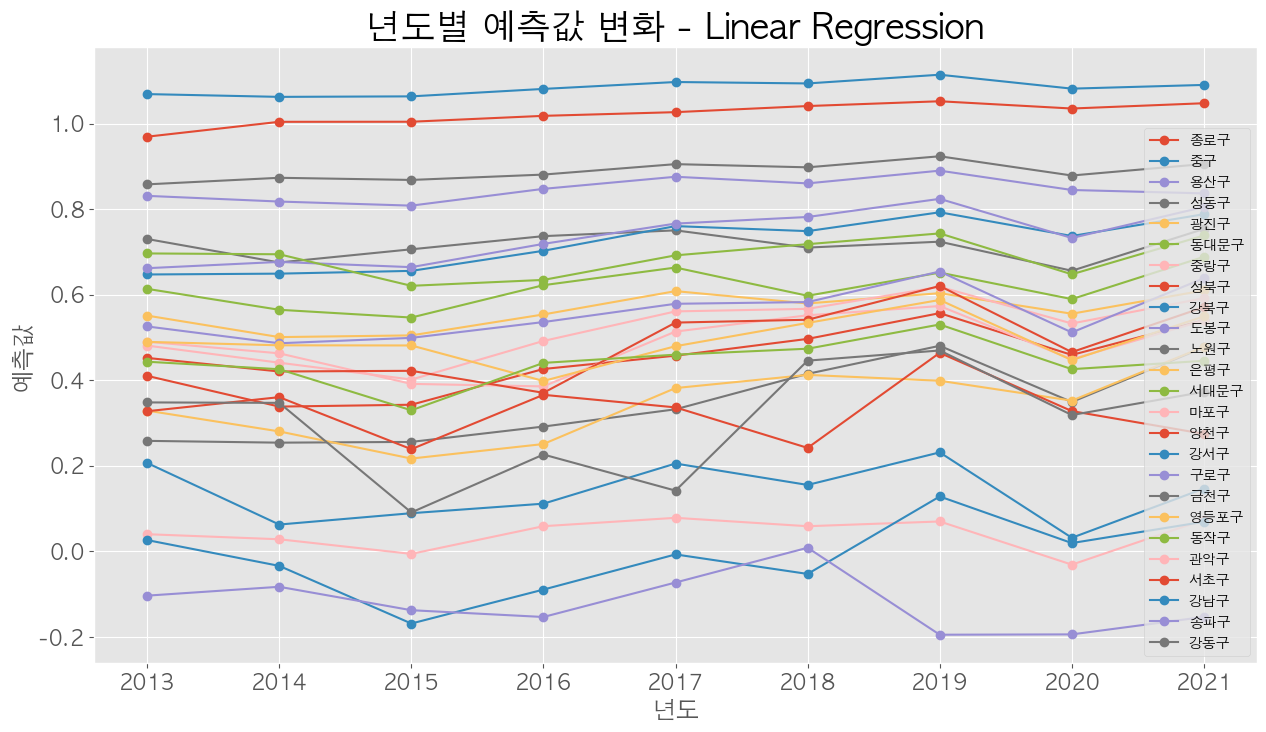

In [76]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

gungu = df["시군구"].unique()
# years = list(range(9))
years = list(range(2013, 2022))
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']
colors = 'rainbow'

for i in range(len(gungu)):
    
    ax.plot(
        years,
        df[df['시군구'] == gungu[i]]['pred_cluster'],
        marker='o',
        label=gungu[i],
        # color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
# ax.set_xlim(-0.5, 9)
# ax.set_ylim(0.75, 1.05)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('년도별 예측값 변화 - Linear Regression', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)
# ax.set_xticklabels(rotation=15, fontsize=15)
# ax.set_yticklabels([0.75, 0.80, 0.85, 0.9, 0.95, 1.00, 1.05], fontsize=15)

plt.show()

### Save Data

In [77]:
df.to_csv("../Data/seoul_3.csv", index=False)

----
## Save Model

In [78]:
# 모델 저장하기
import joblib
filename = "../Data/lr_seoul_2.h5"
joblib.dump(lr, filename)

['../Data/lr_seoul_2.h5']

In [79]:
df_jonro = df[df['시군구']=='종로구']
df_jonro

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,14,1.0,0.969258
1,종로구,2014,27484,905,9,14,1.0,1.004041
2,종로구,2015,27470,906,9,14,1.0,1.004230
3,종로구,2016,26386,846,9,13,1.0,1.017994
4,종로구,2017,25814,689,9,13,1.0,1.026642
5,종로구,2018,24798,644,9,13,1.0,1.040917
6,종로구,2019,23945,673,8,13,1.0,1.052128
7,종로구,2020,25254,529,9,13,1.0,1.035137
8,종로구,2021,24428,528,11,13,1.0,1.047508


In [80]:
df[df['시군구']=='강남구']

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
198,강남구,2013,100020,4551,46,31,0.0,0.025938
199,강남구,2014,104412,4654,48,31,0.0,-0.034418
200,강남구,2015,114523,4595,52,33,0.0,-0.169230
201,강남구,2016,108949,4122,52,33,0.0,-0.089863
202,강남구,2017,103367,3456,56,33,0.0,-0.007630
203,강남구,2018,106802,2940,55,33,0.0,-0.053261
204,강남구,2019,93716,2749,53,33,0.0,0.127875
205,강남구,2020,101582,2356,49,33,0.0,0.018930
206,강남구,2021,98106,2204,51,33,0.0,0.068691


In [81]:
df_jonro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시군구           9 non-null      object 
 1   년도            9 non-null      int64  
 2   전출인구          9 non-null      int64  
 3   출생아수          9 non-null      int64  
 4   산부인과의원수       9 non-null      int64  
 5   초등학교수         9 non-null      int64  
 6   cluster_id    9 non-null      float64
 7   pred_cluster  9 non-null      float64
dtypes: float64(2), int64(5), object(1)
memory usage: 648.0+ bytes


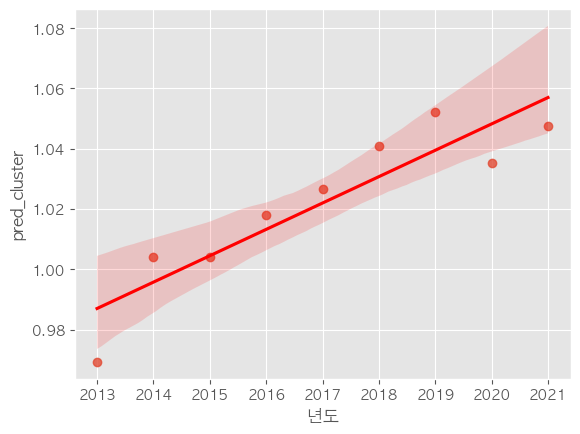

In [82]:
sns.regplot(
    # x = df_jonro.index,
    x = '년도',
    y = 'pred_cluster',
    data=df_jonro,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    # ax=ax2,
    fit_reg=True
)
plt.show()

In [88]:
lr.predict([[30000,20000,100,50]])

array([0.97778493])